# Artificial Intelligence Applications Project:
# "Bank Marketing Campaign"- Norberti Simone && Genovasi Francesco



-----------------

**Context**
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

**Source**
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Link Dataset**
https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

**What is a Term Deposit?**
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

# Import e analisi del Dataset

In [1]:
import pandas as pd
def load_bank_data(): 
    csv_path = "bank.csv"
    return pd.read_csv(csv_path)

bank = load_bank_data()
print("bank.shape:", bank.shape)
print("First 5 rows:")
bank.head()

bank.shape: (11162, 17)
First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### A. Attributes Description: <br>
**Ai. bank client data:**<br>
<a id="bank_client_data"></a>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
8 - **balance:** Balance of the individual.<br><br>
**Aii. Related with the last contact of the current campaign:**
<a id="last_contact"></a><br>
9 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
10 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
11 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
12 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br><br>
**Aiii. other attributes:**<br>
<a id="other_attributes"></a>
13 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
15 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
16 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
17 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
bank.describe() # solo dati numerici

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Fortunatamente non vi sono valori null: in caso scegliere tra questi 3 approcci: fill with the median, drop attribute, drop rows**

**Di seguito i valori degli attributi non numerici**

In [4]:
bank["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [5]:
bank["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [6]:
bank["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [7]:
bank["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [8]:
bank["housing"].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [9]:
bank["loan"].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [10]:
bank["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [11]:
bank["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [12]:
bank["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [13]:
bank["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

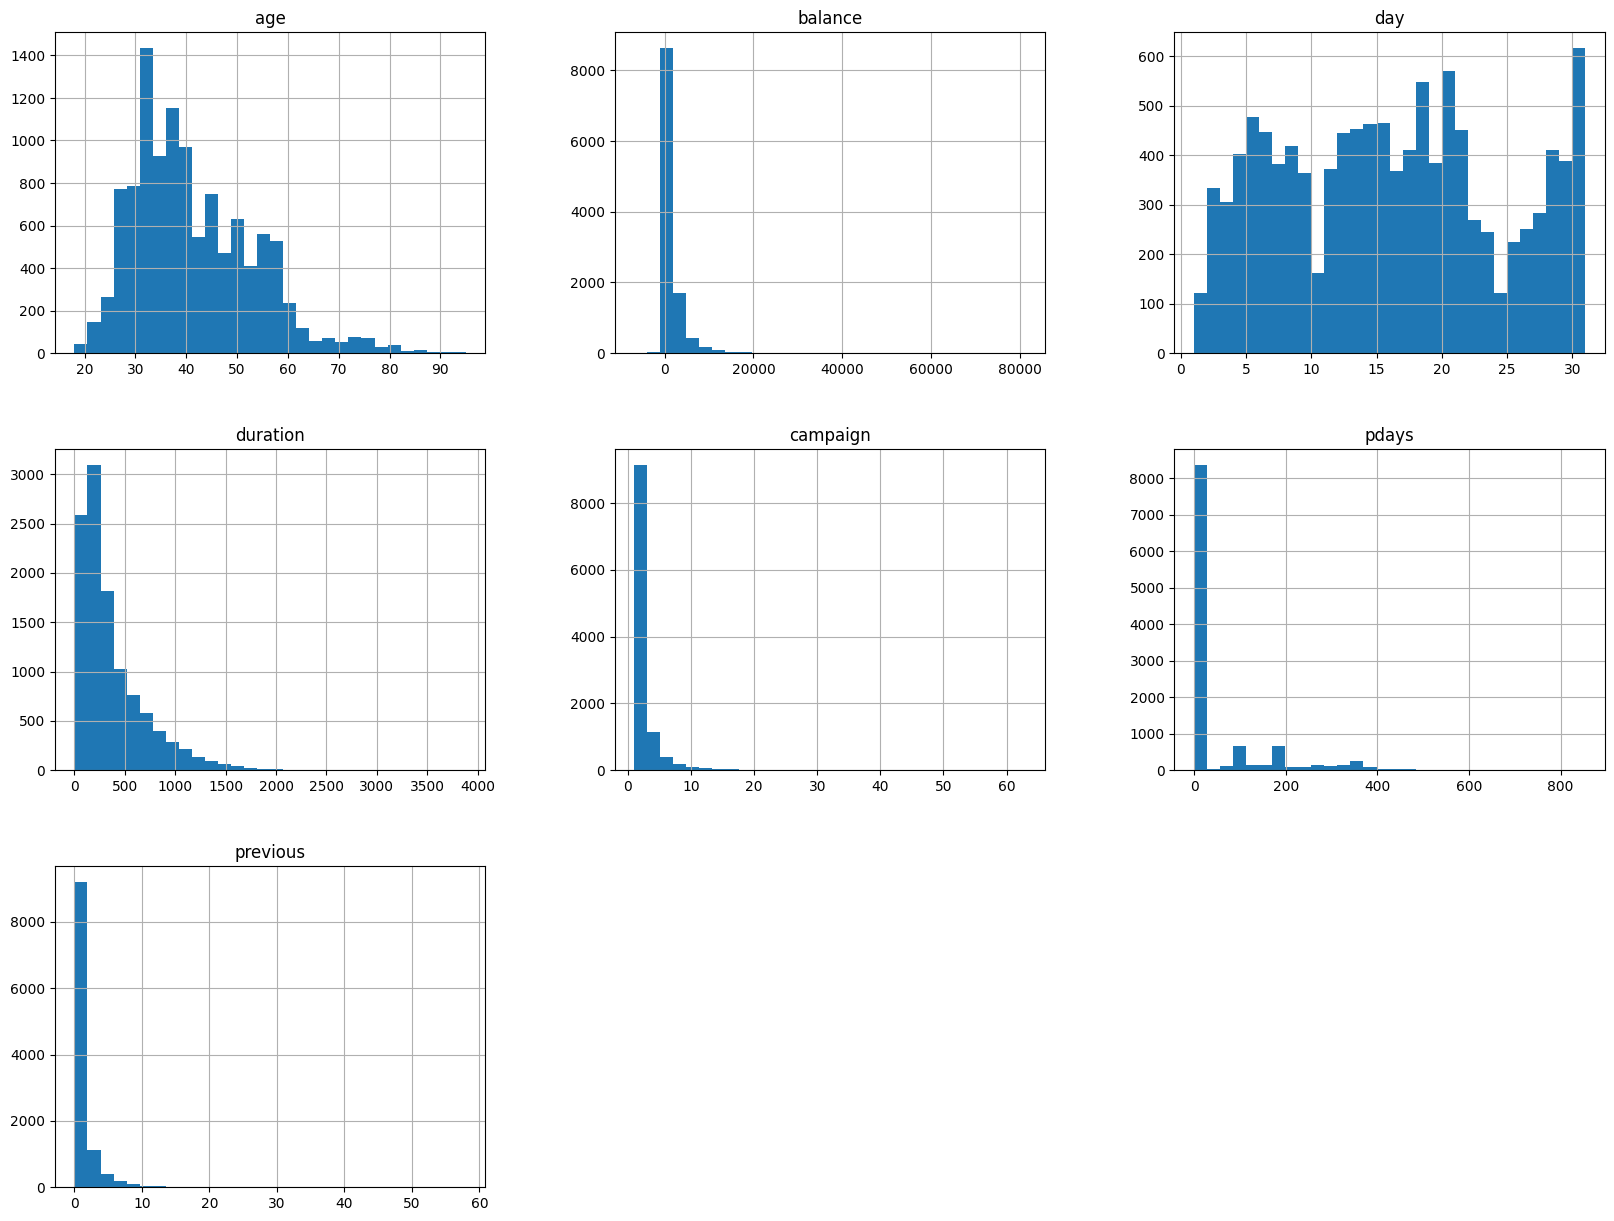

In [14]:
import matplotlib.pyplot as plt
bank.hist(bins=30, figsize=(20,15))
plt.show()
# vengono mostrati gli istogrammi solo di dati numerici

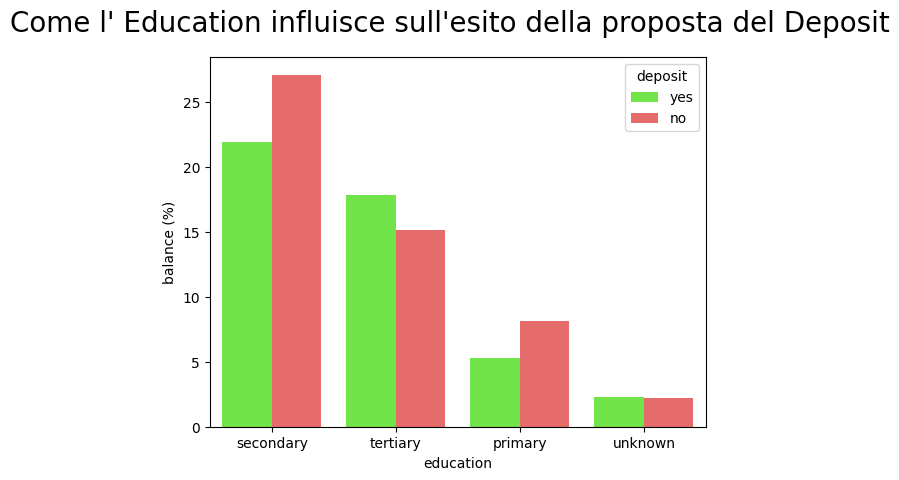

In [15]:
import seaborn as sns

plt.suptitle('Come l\' Education influisce sull\'esito della proposta del Deposit', fontsize=20)
palette = ["#64FE2E", "#FA5858"]
sns.barplot(x="education", y="balance", hue="deposit", data=bank, palette=palette,estimator=lambda x: len(x) / len(bank) * 100)
ax = plt.subplot()
ax.set_ylabel('balance (%)', fontsize=10)
plt.show()

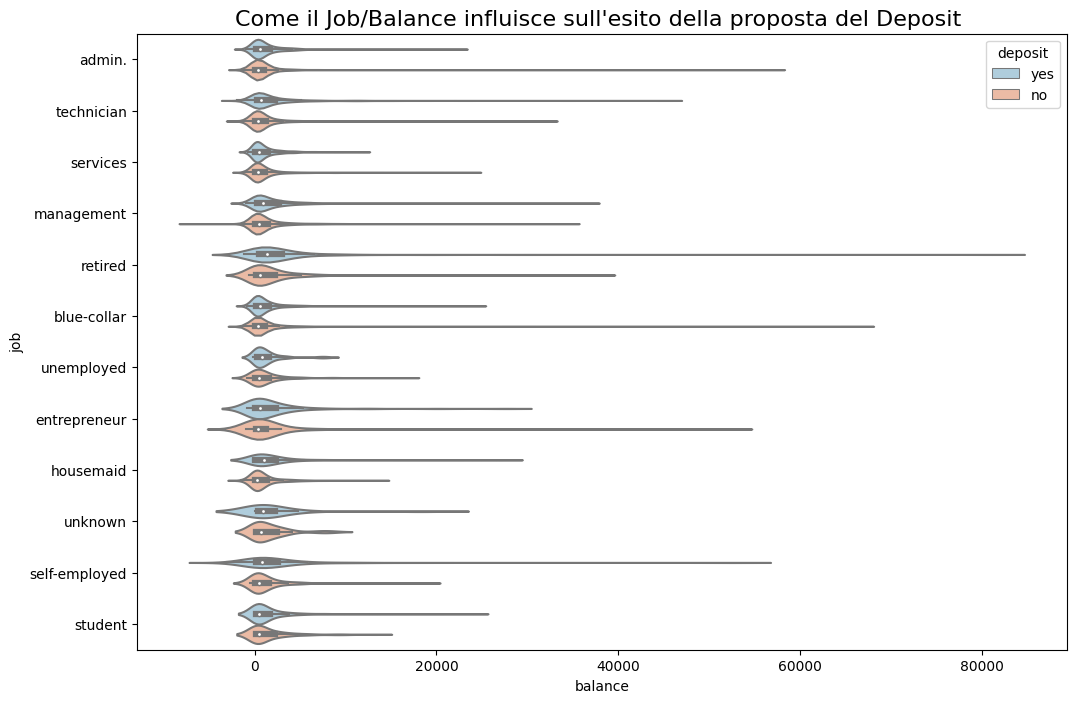

In [16]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=bank);

plt.title("Come il Job/Balance influisce sull\'esito della proposta del Deposit ", fontsize=16)

plt.show()

In [17]:
import numpy as np

bank_tmp = bank
bank_tmp["balance_bin"] = pd.cut(bank_tmp["balance"],
                               bins=[-np.inf, 0, 10000, 30000, 50000, np.inf],
                               labels=[1, 2, 3, 4,5 ])

In [18]:
bank_indeces = np.where(bank["balance_bin"] == 1)
bank_tmp1 = bank_tmp.loc[bank_indeces]

bank_indeces = np.where(bank["balance_bin"] == 2)
bank_tmp2 = bank_tmp.loc[bank_indeces]

bank_indeces = np.where(bank["balance_bin"] == 3)
bank_tmp3 = bank_tmp.loc[bank_indeces]

bank_indeces = np.where(bank["balance_bin"] == 4)
bank_tmp4 = bank_tmp.loc[bank_indeces]

bank_indeces = np.where(bank["balance_bin"] == 5)
bank_tmp5 = bank_tmp.loc[bank_indeces]

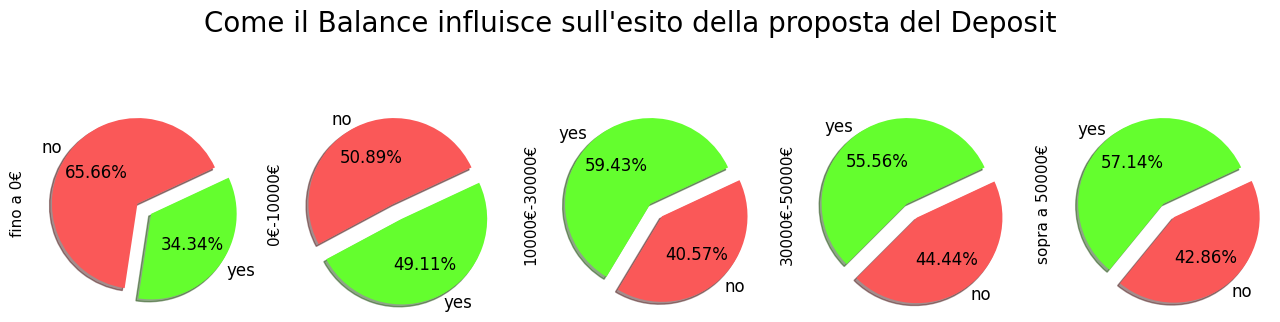

In [19]:
import seaborn as sns
f, ax = plt.subplots(1, 5, figsize=(16,4))

colors1 = ["#FA5858", "#64FE2E"]
colors2 = ["#64FE2E", "#FA5858"]

plt.suptitle('Come il Balance influisce sull\'esito della proposta del Deposit', fontsize=20)

bank_tmp1["deposit"].value_counts().plot.pie( autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors1,
                                              fontsize=12, startangle=25, explode=[0,0.2]) 
bank_tmp2["deposit"].value_counts().plot.pie( autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors1,
                                              fontsize=12, startangle=25, explode=[0,0.2])
bank_tmp3["deposit"].value_counts().plot.pie( autopct='%1.2f%%', ax=ax[2], shadow=True, colors=colors2,
                                              fontsize=12, startangle=25, explode=[0,0.2])
bank_tmp4["deposit"].value_counts().plot.pie( autopct='%1.2f%%', ax=ax[3], shadow=True, colors=colors2,
                                              fontsize=12, startangle=25, explode=[0,0.2])
bank_tmp5["deposit"].value_counts().plot.pie( autopct='%1.2f%%', ax=ax[4], shadow=True, colors=colors2,
                                              fontsize=12, startangle=25, explode=[0,0.2])
ax[0].set_ylabel('fino a 0€', fontsize=11)
ax[1].set_ylabel('0€-10000€', fontsize=11)
ax[2].set_ylabel('10000€-30000€', fontsize=11)
ax[3].set_ylabel('30000€-50000€', fontsize=11)
ax[4].set_ylabel('sopra a 50000€', fontsize=11)
plt.show()

# Pre-processing del Dataset

In [20]:
bank["age_bin"] = pd.cut(bank["age"],
                               bins=[0., 30, 60, np.inf],
                               labels=[1, 2, 3])

bank = bank.drop(labels=['age'], axis=1)

In [21]:
num_attribs = ["balance","day","duration","campaign","pdays", "previous", "age_bin"]
cat_attribs = ["job", "marital", "education", "default", "housing", "loan",
              "contact", "month", "poutcome", "deposit"]

bank_num = bank.drop(cat_attribs, axis=1)
bank_tr = pd.DataFrame(bank_num, columns=bank_num.columns)

In [22]:
# bank_tr.columns.values.tolist()

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


num_attribs = ["balance","day","duration","campaign","pdays", "previous"]
bin_attribs = ["default", "housing", "loan", "deposit"]
cat_attribs = ["age_bin", "job", "marital", "education", "contact", "month", "poutcome"]

numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
     ])
     
full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, num_attribs),
    ("bin", OrdinalEncoder(), bin_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

bank_transformed = full_pipeline.fit_transform(bank)

In [24]:
# full_pipeline.named_transformers_['cat'].categories_

In [25]:
cat_onehot = ['age0-30', 'age30-60', 'age60-95',
              'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 
              'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 
              'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 
              'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 
              'contact_cellular', 
              'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 
              'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 
              'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
attrs = num_attribs + bin_attribs + cat_onehot
bank_transformed_df = pd.DataFrame(bank_transformed, columns=attrs)

bank_transformed_df -> dataframe con: drop age + add age_bin + full_pipeline + nomi_colonne

In [26]:
# bank_transformed_df.hist(bins=30, figsize=(20,15))
# plt.show()

In [27]:
bank_prepared_df = bank_transformed_df

In [28]:
corr_matrix = bank_prepared_df.corr()
corr_matrix["deposit"].sort_values(ascending=False)

deposit                1.000000
duration               0.451919
poutcome_success       0.286642
contact_cellular       0.223252
age60-95               0.167604
pdays                  0.151593
previous               0.139867
month_mar              0.135438
month_oct              0.133783
month_sep              0.126901
job_retired            0.103827
job_student            0.099953
marital_single         0.094632
education_tertiary     0.094598
month_apr              0.090975
age0-30                0.090643
month_dec              0.086964
balance                0.081129
month_feb              0.051710
poutcome_other         0.044059
job_management         0.036301
job_unemployed         0.033487
poutcome_failure       0.020714
contact_telephone      0.016420
education_unknown      0.014355
marital_divorced       0.005228
job_unknown            0.001889
job_admin.            -0.000610
job_self-employed     -0.004707
job_technician        -0.011557
month_aug             -0.016621
month_ju

* I mesi migliori per proporre il deposit sono: Settembre Ottobre Dicembre Marzo Aprile; il mese peggiore è Maggio
* La durata della precedente chiamata influenza l'esito della risposta del cliente alla nuova campagna di proposta deposito. In particolare, più dura la precedente chiamata, più è probabile che il cliente aderisca alla proposta;
* Se il cliente ha aderito alla precedente campagna, è probabile che aderisca alla nuova.
* I clienti contattati sullo smartphone hanno più probabilità di aderire rispetto a quelli contattati sul telefono fisso;
* I clienti under 30 e soprattutto gli over 60 sono più favorevoli ad accettare, i clienti nella fascia d'età 30-60 sono più propensi a rifiutare (es. hanno già un mutuo da pagare)
* I clienti con prestiti personali o mutui sulla casa sono propensi a rifiutare
* La condizione occupazionale dei clienti più favorevoli ad accettare sono pensionati e studenti, il contrario per gli operai 
* Anche lo stato civile influisce: i single tendono ad accettare, gli sposati a rifiutare
* Il numero di contatti ricevuti dal cliente influenza negativamente l'adesione alla campagna
* Chi ha un livello di formazione post-diploma tende ad accettare, chi invece ha un livello inferiore (primario e secondario) tende a rifiutare
* Anche la giacenza media sul conto corrente influisce: più è alto il balance più è probabile che il cliente accetti

In [29]:
import numpy as np
# Definiamo le correlation threshold
threshold_low = -0.02
threshold_high = 0.02

# Troviamo le colonne che sono sotto le threshold
low_correlation_cols = np.where((threshold_low < corr_matrix["deposit"]) & (corr_matrix["deposit"] < threshold_high))

In [30]:
# Troviamo gli attributi da eliminare
todrop_cols = set(attrs[low_correlation_cols[0][i]] for i in range(len(low_correlation_cols[0])))
print(todrop_cols)

# Eliminiamo gli attributi con bassa correlazione con Deposit
bank_prepared_df = bank_prepared_df.drop(columns=list(todrop_cols), axis=1)

{'month_aug', 'month_jun', 'job_self-employed', 'marital_divorced', 'job_technician', 'contact_telephone', 'education_unknown', 'job_admin.', 'job_unknown'}


In [31]:
#bank_prepared_df.head()

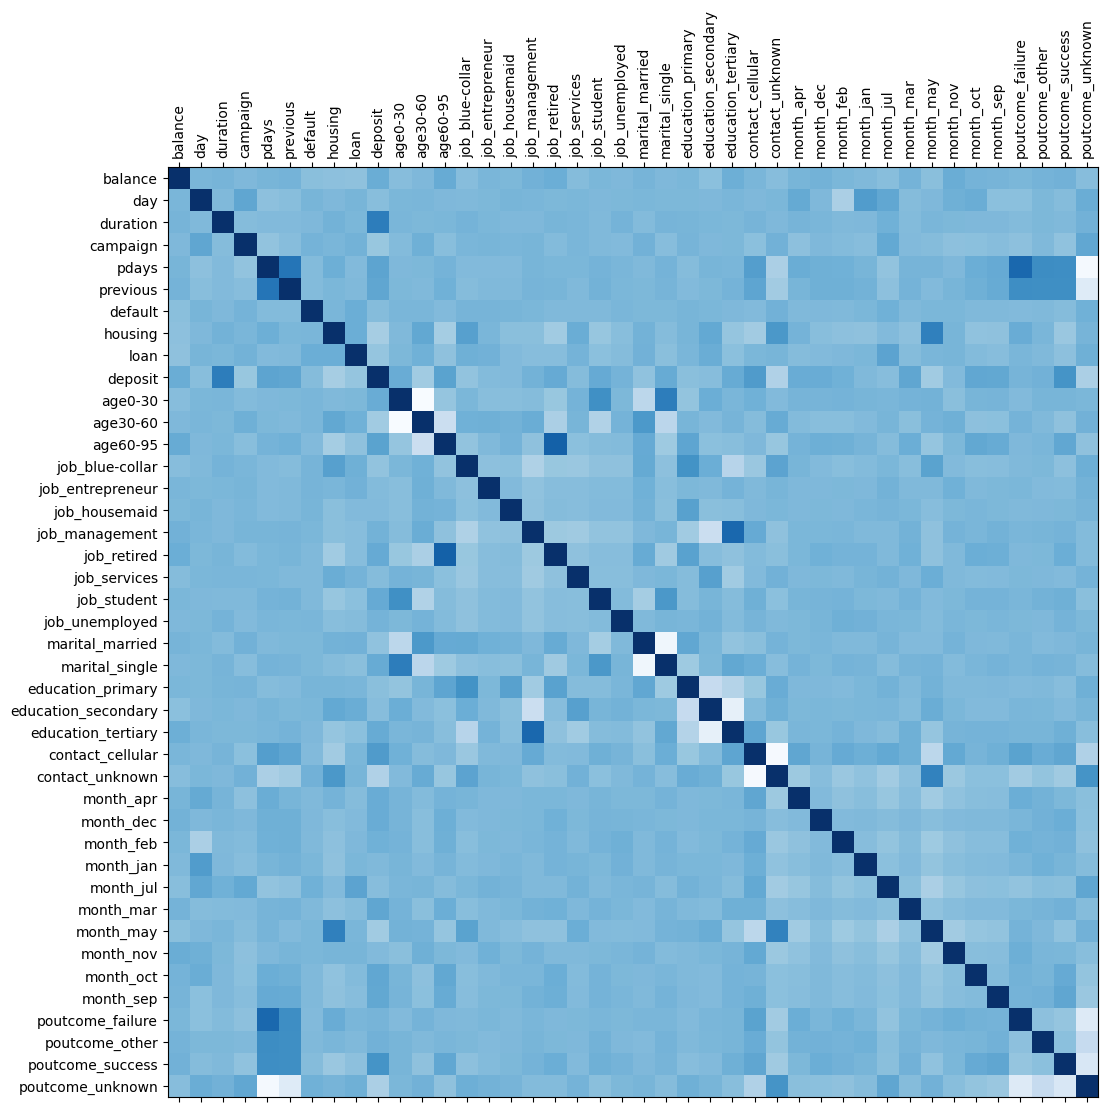

In [32]:
plt.figure(figsize=(12,12))
plt.matshow(bank_prepared_df.corr(), fignum=1, cmap='Blues')
plt.xticks(np.arange(bank_prepared_df.shape[1]), bank_prepared_df.columns.values.tolist(), rotation=90)
plt.yticks(np.arange(bank_prepared_df.shape[1]), bank_prepared_df.columns.values.tolist(), rotation=0)

plt.show()

In [33]:
corr_matrix_dropped = bank_prepared_df.corr()
corr_matrix_dropped["deposit"].sort_values(ascending=False)

deposit                1.000000
duration               0.451919
poutcome_success       0.286642
contact_cellular       0.223252
age60-95               0.167604
pdays                  0.151593
previous               0.139867
month_mar              0.135438
month_oct              0.133783
month_sep              0.126901
job_retired            0.103827
job_student            0.099953
marital_single         0.094632
education_tertiary     0.094598
month_apr              0.090975
age0-30                0.090643
month_dec              0.086964
balance                0.081129
month_feb              0.051710
poutcome_other         0.044059
job_management         0.036301
job_unemployed         0.033487
poutcome_failure       0.020714
month_jan             -0.021803
job_housemaid         -0.024155
month_nov             -0.028278
job_entrepreneur      -0.034443
default               -0.040680
job_services          -0.044531
month_jul             -0.047368
education_secondary   -0.051952
day     

**Split Training-Testing Set**

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bank_prepared_df, bank_prepared_df["deposit"]):
    strat_train_set = bank_prepared_df.loc[train_index]
    strat_test_set = bank_prepared_df.loc[test_index]

In [35]:
X_train = strat_train_set.drop(columns='deposit')
y_train = strat_train_set['deposit']

In [36]:
X_train.head()

,balance,day,duration,campaign,pdays,previous,default,housing,loan,age0-30,...,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8644,-0.310839,1.822008,-0.348572,0.180598,-0.481184,-0.363260,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2632,0.317326,-1.503265,-0.322644,-0.554168,0.392352,3.127287,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3056,-0.430829,-0.553187,-0.489736,-0.554168,0.364766,0.073059,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1080,0.545524,0.634410,1.161024,0.180598,-0.481184,-0.363260,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4006,-0.406645,0.871930,-0.288073,-0.186785,-0.481184,-0.363260,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
y_train

8644    0.0
2632    1.0
3056    1.0
1080    1.0
4006    1.0
       ... 
3751    1.0
9695    0.0
3579    1.0
3386    1.0
9743    0.0
Name: deposit, Length: 8929, dtype: float64

# Training Accuracy

In [38]:
# Time for Classification Models
import time

# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [39]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [40]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_accuracy', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_accuracy'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

df_results = batch_classify(X_train, y_train)
df_results.sort_values(by='train_accuracy', ascending=False)

trained Logistic Regression in 0.11 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 1.08 s
trained Gradient Boosting Classifier in 0.96 s
trained Decision Tree in 0.04 s
trained Random Forest in 0.10 s
trained Neural Net in 3.19 s
trained Naive Bayes in 0.01 s


,classifier,train_accuracy,training_time
4,Decision Tree,1.000000,0.040990
5,Random Forest,0.996640,0.099730
2,Linear SVM,0.869414,1.078313
1,Nearest Neighbors,0.866502,0.003713
3,Gradient Boosting Classifier,0.856759,0.960675
6,Neural Net,0.848135,3.190534
0,Logistic Regression,0.826856,0.111626
7,Naive Bayes,0.716094,0.007789


# Cross-Validation Accuracy

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid_log_reg = [
        {'penalty': ['l2'], 'C': [0.1, 0.3, 0.5, 0.7, 1], 'max_iter': [200]}
]
param_grid_knn_clf = [
        {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
    ]
param_grid_svc_clf = [
        {'C': [0.1, 0.3, 0.5, 0.7, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    ]
param_grid_grad_clf = [
        {'loss': ['log_loss', 'exponential'], 'max_features': ['sqrt', 'log2', None],
        'learning_rate': [0.05, 0.07, 0.1, 0.3]}
    ]
param_grid_tree_clf = [
        {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random']}
    ]
param_grid_rand_clf = [
        {'n_estimators': [30, 100, 150], 'max_features': ['log2', 'sqrt']}
    ]
param_grid_neural_clf = [
        {'solver': ['sgd', 'adam'], 'max_iter': [1500, 2000]}
    ]
param_grid_NB = [
    {'priors': [None]}
]


dict_classifiers = {
    "Logistic Regression": [LogisticRegression(), param_grid_log_reg],
    "Nearest Neighbors": [KNeighborsClassifier(), param_grid_knn_clf],
    "SVM": [SVC(), param_grid_svc_clf],
    "Gradient Boosting Classifier": [GradientBoostingClassifier(), param_grid_grad_clf],
    "Decision Tree": [tree.DecisionTreeClassifier(), param_grid_tree_clf],
    "Random Forest": [RandomForestClassifier(), param_grid_rand_clf],
    "Neural Net": [MLPClassifier(), param_grid_neural_clf],
    "Naive Bayes": [GaussianNB(), param_grid_NB]
}

In [42]:
no_classifiers = len(dict_classifiers.keys())
df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,2)),
                          columns = ['classifier', 'val_accuracy'])

count=0
grid_search_result = []
for key, classifier in dict_classifiers.items():
    grid_search = GridSearchCV(classifier[0], classifier[1], cv=3, n_jobs=-1, 
                               scoring='accuracy')
                               #return_train_score=True)
    grid_search.fit(X_train, y_train)
    grid_search_result.append(grid_search.best_estimator_)
    df_results.loc[count,'classifier'] = key
    df_results.loc[count,'val_accuracy'] = grid_search.cv_results_['mean_test_score'].mean()
    count += 1
    print(key,
          "\n   Best params:", grid_search.best_params_,
          "\n   Accuracy:", grid_search.cv_results_['mean_test_score'].mean())

Logistic Regression 
   Best params: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2'} 
   Accuracy: 0.8234725036510498
Nearest Neighbors 
   Best params: {'n_neighbors': 10, 'weights': 'distance'} 
   Accuracy: 0.7991645580197885
SVM 
   Best params: {'C': 1, 'kernel': 'rbf'} 
   Accuracy: 0.8097534596933722
Gradient Boosting Classifier 
   Best params: {'learning_rate': 0.3, 'loss': 'exponential', 'max_features': None} 
   Accuracy: 0.8364630376093257
Decision Tree 
   Best params: {'criterion': 'log_loss', 'splitter': 'random'} 
   Accuracy: 0.7752826052102358
Random Forest 
   Best params: {'max_features': 'sqrt', 'n_estimators': 100} 
   Accuracy: 0.8369537885336764
Neural Net 
   Best params: {'max_iter': 2000, 'solver': 'sgd'} 
   Accuracy: 0.8285905145090858
Naive Bayes 
   Best params: {'priors': None} 
   Accuracy: 0.7126206080548242


In [43]:
df_results.sort_values(by='val_accuracy', ascending=False)

,classifier,val_accuracy
5,Random Forest,0.836954
3,Gradient Boosting Classifier,0.836463
6,Neural Net,0.828591
0,Logistic Regression,0.823473
2,SVM,0.809753
1,Nearest Neighbors,0.799165
4,Decision Tree,0.775283
7,Naive Bayes,0.712621


In [44]:
from sklearn.model_selection import cross_val_predict

# Logistic Regression
final_LR_clf = grid_search_result[0]#.fit(X_train, y_train)
    # LR_clf_predictions = final_LR_clf.predict(X_train)
LR_clf_predictions_cross_val = cross_val_predict(final_LR_clf, X_train, y_train, cv=3)
y_scores_LR = cross_val_predict(final_LR_clf, X_train, y_train, cv=3, method="predict_proba")

# Gradient Boosting
final_GB_clf = grid_search_result[3]#.fit(X_train, y_train)
    # GB_clf_predictions = final_GB_clf.predict(X_train)
GB_clf_predictions_cross_val = cross_val_predict(final_GB_clf, X_train, y_train, cv=3)
y_scores_GB = cross_val_predict(final_GB_clf, X_train, y_train, cv=3, method="decision_function")

# Random Forest
final_RF_clf = grid_search_result[5]#.fit(X_train, y_train)
    # RF_clf_predictions = final_RF_clf.predict(X_train)
RF_clf_predictions_cross_val = cross_val_predict(final_RF_clf, X_train, y_train, cv=3)
y_scores_RF = cross_val_predict(final_RF_clf, X_train, y_train, cv=3, method="predict_proba")

# Neural Net
final_NC_clf = grid_search_result[6]#.fit(X_train, y_train)
    # NC_clf_predictions = final_NC_clf.predict(X_train)
NC_clf_predictions_cross_val = cross_val_predict(final_NC_clf, X_train, y_train, cv=3)
y_scores_NC = cross_val_predict(final_NC_clf, X_train, y_train, cv=3, method="predict_proba")

# Naive Bayes
final_NB_clf = grid_search_result[7]#.fit(X_train, y_train)
NB_clf_predictions_cross_val = cross_val_predict(final_NB_clf, X_train, y_train, cv=3)
y_scores_NB = cross_val_predict(final_NB_clf, X_train, y_train, cv=3, method="predict_proba")

# Confusion Matrix
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*PPgItHcPSaskyjLMWFC-Kw.png">

The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying 
potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four 
terms the True Positives, False Positives, True Negatives and False Negatives.


Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" class 
or potenial clients that are not willing to suscribe a term deposit. 


False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No" class 
or potential clients that are not willing to suscribe a term depositt. 


False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" class 
or potential clients that are willing to suscribe a term deposit. 


True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" class 
or potenial clients that are willing to suscribe a term deposit.

In [45]:
# final_GB_clf = GradientBoostingClassifier(learning_rate=0.1, loss='log_loss', max_features='log2').fit(X_train, y_train)
# GB_clf_predictions = final_GB_clf.predict(X_train)
# from sklearn.model_selection import cross_val_predict
# GB_clf_predictions_cross_val = cross_val_predict(final_GB_clf, X_train, y_train, cv=3)

### Gradient Boosting

In [46]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, GB_clf_predictions_cross_val)
conf_matrix

array([[3950,  748],
       [ 585, 3646]])

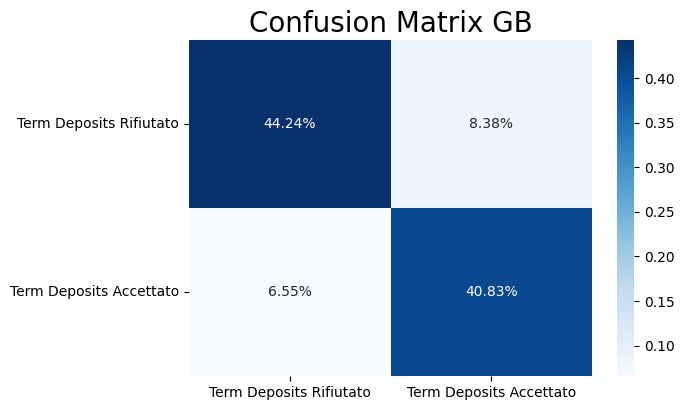

In [47]:
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix GB", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10)
ax.set_yticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10, rotation=360)
plt.show()

### Random Forest

In [48]:
conf_matrix = confusion_matrix(y_train, RF_clf_predictions_cross_val)
conf_matrix

array([[3863,  835],
       [ 600, 3631]])

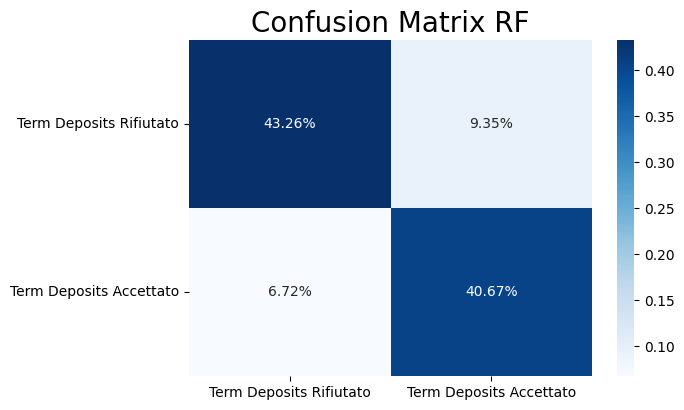

In [49]:
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix RF", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10)
ax.set_yticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10, rotation=360)
plt.show()

### Neural Net

In [50]:
conf_matrix = confusion_matrix(y_train, NC_clf_predictions_cross_val)
conf_matrix

array([[3872,  826],
       [ 610, 3621]])

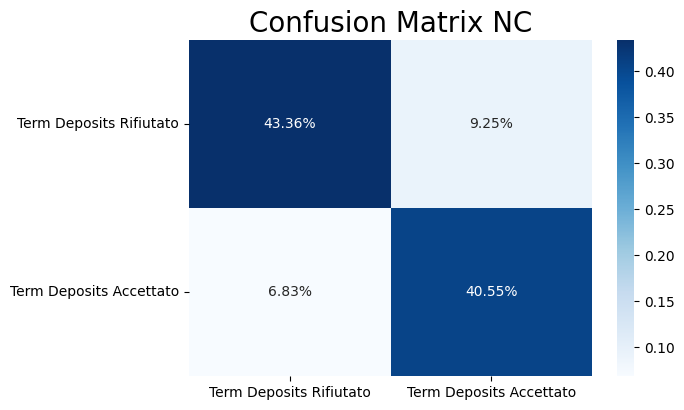

In [51]:
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix NC", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10)
ax.set_yticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10, rotation=360)
plt.show()

### Logistic Regression

In [52]:
conf_matrix = confusion_matrix(y_train, LR_clf_predictions_cross_val)
conf_matrix

array([[4002,  696],
       [ 877, 3354]])

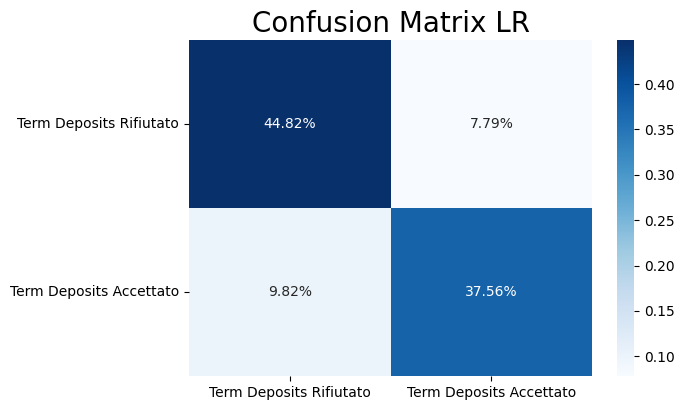

In [53]:
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix LR", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10)
ax.set_yticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10, rotation=360)
plt.show()

### Naive Bayes

In [54]:
conf_matrix = confusion_matrix(y_train, NB_clf_predictions_cross_val)
conf_matrix

array([[4114,  584],
       [1982, 2249]])

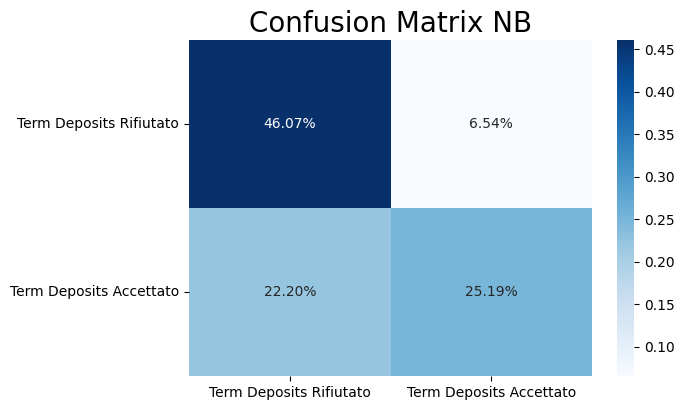

In [55]:
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix NB", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10)
ax.set_yticklabels(['Term Deposits Rifiutato', 'Term Deposits Accettato'], fontsize=10, rotation=360)
plt.show()

# Precision, Recall, F1

La **PRECISION** è una misura dell'utilità dei risultati del classificatore nei dati del test. \
È definita come il numero di elementi accuratamente classificati, diviso per il numero totale di classificazioni per la classe. \
Alta precisione significa che il classificatore ha restituito risultati significativamente più pertinenti rispetto a quelli irrilevanti. \
<img src="https://miro.medium.com/v2/1*KWZHeEuBGhDfw5CTE_PRfQ.png" style="width:300px;height:150;">


La **RECALL** indica la percentuale di categorie corrette che il modello è in grado di prevedere. \
Questa metrica deriva dalla media dei punteggi di recall di tutte le etichette disponibili. \
La recall è una misura della completezza dei risultati del classificatore per i dati del test. \
Una recall elevato significa che il classificatore ha restituito la maggior parte dei risultati pertinenti. \
<img src="https://miro.medium.com/v2/1*LmttOOk86tXBGlaC_73Xag.png" style="width:300px;height:150;">


L'**F1 score** è derivato dai valori di Recall e Precision. \
Misura la precisione complessiva del classificatore. \
Il punteggio più alto è 1 e il punteggio più basso è 0. \
<img src="https://miro.medium.com/v2/1*XH-bmDiJ50rWfqBR82NOdQ.png" style="width:300px;height:150;">

In [56]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score

def plot_precision_recall_vs_threshold_and_recall(precisions, recalls, thresholds, F1): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") # b = blue; -- = dashed line
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") # g = green; - = linea continua
    plt.plot(thresholds, F1[:-1], "r-.", label="F1") # g = green; - = linea continua
    plt.legend()
    # highlight the threshold, add the legend, axis label and grid

In [57]:
df_results = pd.DataFrame(data=np.zeros(shape=(5,4)),
                          columns = ['classifier', 'Recall', 'Precision', 'F1 score'])

df_results.loc[0, 'classifier'] = "Gradient Boosting"
df_results.loc[0, 'Recall'] = recall_score(y_train, GB_clf_predictions_cross_val)
df_results.loc[0, 'Precision'] = precision_score(y_train, GB_clf_predictions_cross_val)
df_results.loc[0, 'F1 score'] = f1_score(y_train, GB_clf_predictions_cross_val)

df_results.loc[1, 'classifier'] = "Random Forest"
df_results.loc[1, 'Recall'] = recall_score(y_train, RF_clf_predictions_cross_val)
df_results.loc[1, 'Precision'] = precision_score(y_train, RF_clf_predictions_cross_val)
df_results.loc[1, 'F1 score'] = f1_score(y_train, RF_clf_predictions_cross_val)

df_results.loc[2, 'classifier'] = "Neural Network"
df_results.loc[2, 'Recall'] = recall_score(y_train, NC_clf_predictions_cross_val)
df_results.loc[2, 'Precision'] = precision_score(y_train, NC_clf_predictions_cross_val)
df_results.loc[2, 'F1 score'] = f1_score(y_train, NC_clf_predictions_cross_val)

df_results.loc[3, 'classifier'] = "Logistic Regression"
df_results.loc[3, 'Recall'] = recall_score(y_train, LR_clf_predictions_cross_val)
df_results.loc[3, 'Precision'] = precision_score(y_train, LR_clf_predictions_cross_val)
df_results.loc[3, 'F1 score'] = f1_score(y_train, LR_clf_predictions_cross_val)

df_results.loc[4, 'classifier'] = "Naive Bayes"
df_results.loc[4, 'Recall'] = recall_score(y_train, NB_clf_predictions_cross_val)
df_results.loc[4, 'Precision'] = precision_score(y_train, NB_clf_predictions_cross_val)
df_results.loc[4, 'F1 score'] = f1_score(y_train, NB_clf_predictions_cross_val)

df_results.sort_values(by='F1 score', ascending=False)

,classifier,Recall,Precision,F1 score
0,Gradient Boosting,0.861735,0.829768,0.845449
1,Random Forest,0.858190,0.813032,0.835001
2,Neural Network,0.855826,0.814257,0.834524
3,Logistic Regression,0.792720,0.828148,0.810047
4,Naive Bayes,0.531553,0.793858,0.636750


### Recall vs Precision Trade-Off (es. Gradient Boosting)

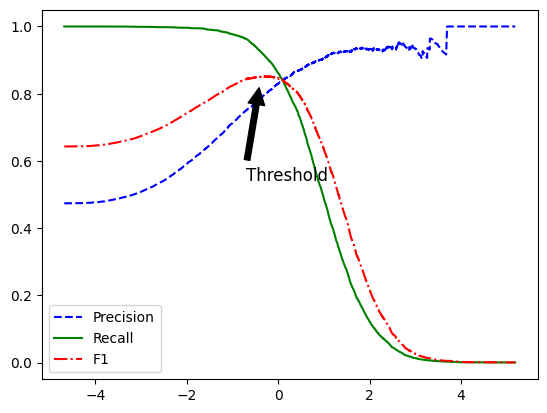

In [58]:
# calcoliamo gli y_scores con la cross_val_predict
# y_scores_GB = cross_val_predict(final_GB_clf, X_train, y_train, cv=3, method="decision_function")

# facciamo il plot di thresholds, recalls e precisions
precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(y_train, y_scores_GB)
precisions_RF, recalls_RF, thresholds_RF = precision_recall_curve(y_train, y_scores_RF[:, 1])
precisions_LR, recalls_LR, thresholds_LR = precision_recall_curve(y_train, y_scores_LR[:, 1])
precisions_NB, recalls_NB, thresholds_NB = precision_recall_curve(y_train, y_scores_NB[:, 1])
precisions_NC, recalls_NC, thresholds_NC = precision_recall_curve(y_train, y_scores_NC[:, 1])

F1_GB = 2*((precisions_GB*recalls_GB)/(precisions_GB+recalls_GB))



plot_precision_recall_vs_threshold_and_recall(precisions_GB, recalls_GB, thresholds_GB, F1_GB)
plt.annotate('Threshold', xy=(-0.4, 0.83), xytext=(-10, -70),
                 textcoords="offset points", arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12, color='k')
plt.show()

In [59]:
best_th_GB = thresholds_GB[np.argmax(F1_GB)] # migliore threshold da utilizzare
print("La threshold da utilizzare è il massimo dell'F1 score ovvero %2.6f" %best_th_GB)

La threshold da utilizzare è il massimo dell'F1 score ovvero -0.223409


In [60]:
predictions_GB = (y_scores_GB > best_th_GB)

prec_GB = precision_score(y_train, predictions_GB)
recall_GB = recall_score(y_train, predictions_GB)

print("recall: ", recall_GB, "\t precision:", prec_GB, "\t f1 score: ", f1_score(y_train, predictions_GB))

recall:  0.9028598440085086 	 precision: 0.8059071729957806 	 f1 score:  0.8516330397948946


Come possiamo notare l'F1 score è aumentato!

Nel nostro caso conviene avere una recall piu alta (numero maggiore di persone da chiamare == numero maggiore di falsi positivi)

<img src="https://miro.medium.com/v2/1*LmttOOk86tXBGlaC_73Xag.png" style="width:300px;height:150;">

recall = persone che abbiamo contattato / (persone che abbiamo contattato + persone che avremmo dovuto contattare)

se il recall è alto allora le persone che avremmo dovuto contattare ma che non abbiamo contattato sono poche 

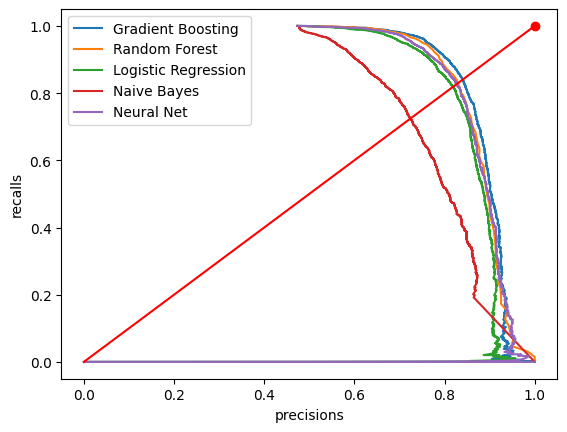

In [61]:
plt.plot(precisions_GB, recalls_GB, label="Gradient Boosting")
plt.plot(precisions_RF, recalls_RF, label="Random Forest")
plt.plot(precisions_LR, recalls_LR, label="Logistic Regression")
plt.plot(precisions_NB, recalls_NB, label="Naive Bayes")
plt.plot(precisions_NC, recalls_NC, label="Neural Net")

plt.plot([0,1],[0,1], color="red") # bisettrice
plt.plot(1,1, color="red", marker="o") # intersezione ideale

plt.xlabel("precisions")
plt.ylabel("recalls")
plt.legend()
plt.show()

# ROC curves e Areas Under the Curves

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel("false positive rate")
    plt.ylabel("recall (true positive rate)")
    # Add axis labels and grid

# Gradient Boosting Classifier
fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_train, y_scores_GB)

# Neural Net
#final_NC_clf = MLPClassifier(max_iter=1000, solver='sgd').fit(X_train, y_train)
#y_scores_NC = cross_val_predict(final_NC_clf, X_train, y_train, cv=3, method="predict_proba")
fpr_NC, tpr_NC, thresholds = roc_curve(y_train, y_scores_NC[:,1])

# Random Forest
#final_RF_clf = RandomForestClassifier(max_features='sqrt', n_estimators=150).fit(X_train, y_train)
#y_scores_RF = cross_val_predict(final_RF_clf, X_train, y_train, cv=3, method="predict_proba")
fpr_RF, tpr_RF, thresholds = roc_curve(y_train, y_scores_RF[:,1])

# Logistic Regression
#final_LR = LogisticRegression(C=0.5, penalty='l2', max_iter=200).fit(X_train, y_train)
#y_scores_LR = cross_val_predict(final_LR, X_train, y_train, cv=3, method="predict_proba")
fpr_LR, tpr_LR, thresholds = roc_curve(y_train, y_scores_LR[:,1])

# Naive Bayes
#final_NB = GaussianNB().fit(X_train, y_train)
#y_scores_NB = cross_val_predict(final_NB, X_train, y_train, cv=3, method="predict_proba")
fpr_NB, tpr_NB, thresholds = roc_curve(y_train, y_scores_NB[:,1])

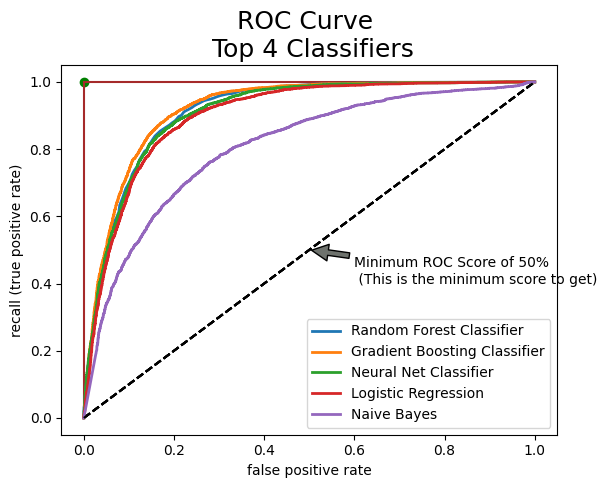

In [63]:
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(0,1, color="green", marker="o") # ideale
plt.plot([0,1],[1,1], color='brown')
plt.plot([0,0],[0,1], color='brown') # ideale
plot_roc_curve(fpr_RF, tpr_RF, 'Random Forest Classifier')
plot_roc_curve(fpr_GB, tpr_GB, 'Gradient Boosting Classifier')
plot_roc_curve(fpr_NC, tpr_NC, 'Neural Net Classifier')
plot_roc_curve(fpr_LR, tpr_LR, 'Logistic Regression')
plot_roc_curve(fpr_NB, tpr_NB, 'Naive Bayes')
plt.legend()
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.show()

In [64]:
print("L'area sotto la ROC Curve dovrebbe avvicinarsi ad 1, noi abbiamo:")
print("Gradient Boosting: ", roc_auc_score(y_train, y_scores_GB))
print("Random Forest: ", roc_auc_score(y_train, y_scores_RF[:,1]))
print("Neural Net: ", roc_auc_score(y_train, y_scores_NC[:,1]))
print("Logistic Regression: ", roc_auc_score(y_train, y_scores_LR[:,1]))
print("...")
print("Naive Bayes: ", roc_auc_score(y_train, y_scores_NB[:,1]))

L'area sotto la ROC Curve dovrebbe avvicinarsi ad 1, noi abbiamo:
Gradient Boosting:  0.9202982074270076
Random Forest:  0.9132707974820243
Neural Net:  0.9093742802697238
Logistic Regression:  0.900358993538237
...
Naive Bayes:  0.8062774868419847


In [65]:
feature_importances = final_GB_clf.feature_importances_

In [66]:
feature_names = X_train.columns
indices = np.argsort(feature_importances)[::-1]

feature_names

Index(['balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default', 'housing', 'loan', 'age0-30', 'age30-60', 'age60-95',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_services', 'job_student',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_unknown', 'month_apr', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

Feature ranking:
1. duration (0.456153)
2. poutcome_success (0.080725)
3. contact_unknown (0.072036)
4. day (0.054578)
5. pdays (0.041327)
6. balance (0.039229)
7. housing (0.035820)
8. month_feb (0.026102)
9. month_mar (0.023673)
10. month_oct (0.022140)
11. age30-60 (0.020434)
12. month_apr (0.019692)
13. month_nov (0.016087)
14. campaign (0.011919)
15. month_may (0.011504)
16. month_jul (0.009756)
17. previous (0.008767)
18. loan (0.006502)
19. month_sep (0.006237)
20. month_jan (0.005589)
21. age60-95 (0.004522)
22. poutcome_other (0.004174)
23. education_tertiary (0.003851)
24. month_dec (0.003206)
25. job_student (0.002818)
26. job_blue-collar (0.002541)
27. job_services (0.002469)
28. job_housemaid (0.001386)
29. education_primary (0.001380)
30. contact_cellular (0.001034)
31. job_entrepreneur (0.000973)
32. marital_married (0.000964)
33. job_management (0.000841)
34. poutcome_unknown (0.000437)
35. default (0.000431)
36. poutcome_failure (0.000390)
37. job_unemployed (0.000184)

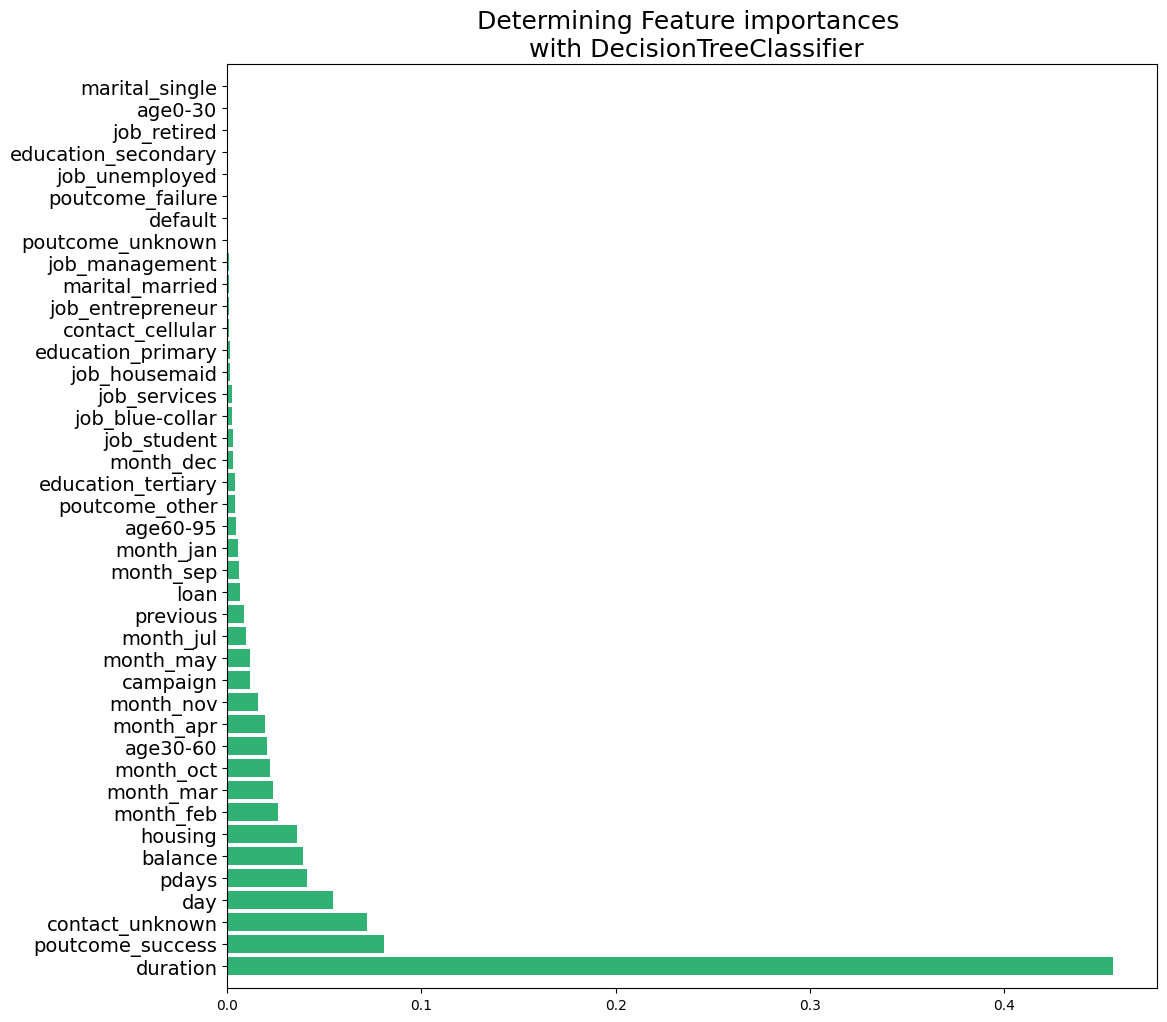

In [67]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importances[indices[f]]))
    # print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,12))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    # plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    # plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, feature_importances, feature_names)
plt.show()

# Testing

### Combined Classifier

In [68]:
# Our 4 best classifiers are final_GB_clf, final_NC_clf, final_RF_clf e final_LR
# Creiamo un ensamble dei 3 classificatori migliori attraverso un soft voting
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('gbc', final_GB_clf), ('nnc', final_NC_clf), ('rfc', final_RF_clf)], n_jobs=-1,
    voting='soft' # voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(learning_rate=0.3,
                                                         loss='exponential')),
                             ('nnc',
                              MLPClassifier(max_iter=2000, solver='sgd')),
                             ('rfc', RandomForestClassifier())],
                 n_jobs=-1, voting='soft')

### Evaluation

In [69]:
y_test = strat_test_set["deposit"]
X_test = strat_test_set.drop(columns='deposit')

In [70]:
from sklearn.metrics import accuracy_score

# differenze tra i 4 migliori e il voting
df_results = pd.DataFrame(data=np.zeros(shape=(4, 2)),
                          columns = ['classifier', 'test_accuracy'])
count = 0
for clf in (final_GB_clf, final_NC_clf, final_RF_clf, final_LR_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    df_results.loc[count,'classifier'] = clf.__class__.__name__
    df_results.loc[count,'test_accuracy'] = accuracy_score(y_test, predict)
    count += 1

df_results.sort_values(by='test_accuracy', ascending=False)

,classifier,test_accuracy
0,GradientBoostingClassifier,0.859382
1,MLPClassifier,0.854008
4,VotingClassifier,0.853560
2,RandomForestClassifier,0.851321
3,LogisticRegression,0.826243
